In [1]:
import numpy as np
from matplotlib import pyplot as mp
import cv2 as cv
from PIL import Image, ImageColor, ImageDraw
from jupyterthemes import jtplot

In [2]:
jtplot.reset()
# mpl.use('nbagg')
mp.style.use("seaborn")
mp.rcParams["axes.axisbelow"] = True
mp.rcParams["text.usetex"] = True
mp.rcParams["font.family"] = "serif"
mp.rcParams["figure.figsize"] = (16/2, 9/2)
mp.rcParams["figure.dpi"] = 100
mp.rcParams["text.latex.preamble"] = [r"\usepackage{physics}"]

In [5]:
class Morpho:
    
    def __init__(self, N=512):
        self.N = N
        
    def make_square(self, length=100):
        N = self.N
        r = length//2
        im = Image.new('L', (N, N), 'black')
        draw = ImageDraw.Draw(im)
        draw.rectangle(((N//2-r, N//2-r), (N//2+r, N//2+r)), 'white')
        im = np.asarray(im, 'uint8')
        self.square = im
        
    def make_triangle(self, base=120, height=90):
        N = self.N
        b = base
        h = height
        im = Image.new('L', (N, N), 'black')
        draw = ImageDraw.Draw(im)
        draw.polygon(((N//2-b//2, N//2-h//2), (N//2-b//2, N//2+h//2), (N//2+b//2, N//2+h//2)), 'white')
        im = np.asarray(im, 'uint8')
        self.triangle = im
        
    def make_hollow_box(self, length=100):
        N = self.N
        r = length//2
        im = Image.new('L', (N, N), 'black')
        draw = ImageDraw.Draw(im)
        draw.rectangle(((N//2-r, N//2-r), (N//2+r, N//2+r)), fill=None, outline='white', width=2)
        im = np.asarray(im, 'uint8')
        self.hollow_box = im
        
    def make_cross(self, length=100, thickness=10):
        N = self.N
        r = length
        im = Image.new('L', (N, N), 'black')
        draw = ImageDraw.Draw(im)
        draw.line(((N//2, N//2-r), (N//2, N//2+r)), fill='white', width=thickness)
        draw.line(((N//2-r, N//2), (N//2+r, N//2)), fill='white', width=thickness)
        im = np.asarray(im, 'uint8')
        self.cross = im
        
    def erode(self, shape, kernel):
        return cv.erode(shape, kernel)
    
    def dilate(self, shape, kernel):
        return cv.dilate(shape, kernel)
            
    def plot_op(self, img_arr, kernel_arr, result_arr, operation_name):
        fig = mp.figure(figsize=(16/2*1.5, 9/2))

        ax = fig.add_subplot(131)
        ax.imshow(img_arr, 'gray', vmin=0, vmax=255)
        ax.xaxis.set_major_locator(mp.MultipleLocator(1))
        ax.yaxis.set_major_locator(mp.MultipleLocator(1))
        ax.grid(True, alpha=0.1)
        ax.set_xlim(0, 20)
        ax.set_ylim(0, 20)
#         ax.set_xticklabels([])
#         ax.set_yticklabels([])
        ax.set_title('original')

        ax = fig.add_subplot(132)
        ax.imshow(kernel_arr, 'gray', vmin=0, vmax=1)
        ax.xaxis.set_major_locator(mp.MultipleLocator(1))
        ax.yaxis.set_major_locator(mp.MultipleLocator(1))
        ax.grid(True, color='gray', alpha=0.1)
        ax.set_xlim(-3, 4)
        ax.set_ylim(-3, 4)
#         ax.set_xticklabels([])
#         ax.set_yticklabels([])
        ax.set_title('kernel')

        ax = fig.add_subplot(133)
        ax.imshow(result_arr, 'gray')
        ax.xaxis.set_major_locator(mp.MultipleLocator(1))
        ax.yaxis.set_major_locator(mp.MultipleLocator(1))
        ax.grid(True, alpha=0.1)
        ax.set_xlim(0, 20)
        ax.set_ylim(0, 20)
#         ax.set_xticklabels([])
#         ax.set_yticklabels([])
        ax.set_title(operation_name)

        mp.tight_layout()
        mp.show()

In [8]:
kernel1 = np.ones((2, 2))
kernel2 = np.ones((2, 1))
kernel3 = np.ones((1, 2))
kernel4 = cv.getStructuringElement(cv.MORPH_CROSS, (3, 3))
kernel5 = np.fliplr(np.diag(np.array([1, 1], dtype='uint8')))
kernels = [kernel1, kernel2, kernel3, kernel4, kernel5]
kernelnames = ['2x2', '2x1', '1x2', 'cross', 'invdiag']

morp = Morpho(21)
morp.make_square(10)
morp.make_triangle(4, 3)
morp.make_hollow_box(10)
morp.make_cross(5, 1)
shapes = [morp.square, morp.triangle, morp.hollow_box, morp.cross]
shapenames = ['square', 'triangle', 'box', 'plus']

operations = [cv.dilate, cv.erode]
opnames = ['dilate', 'erode']

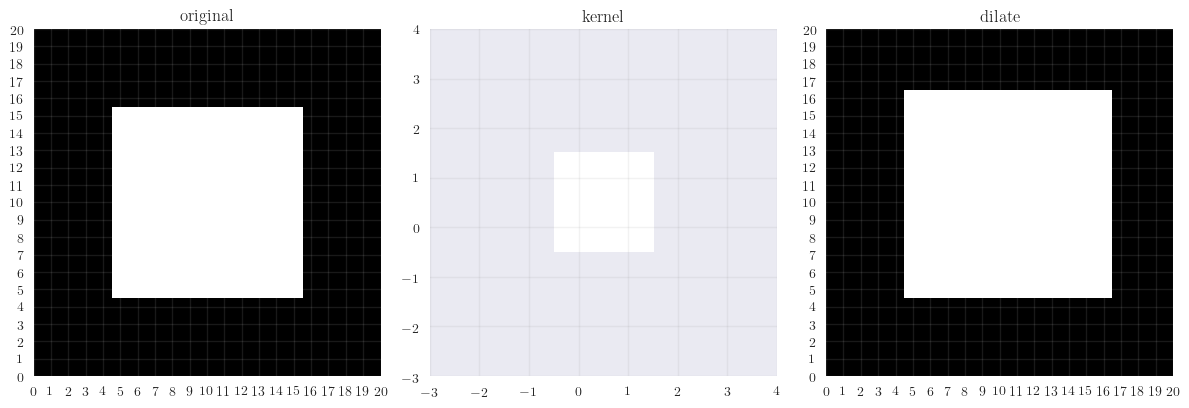

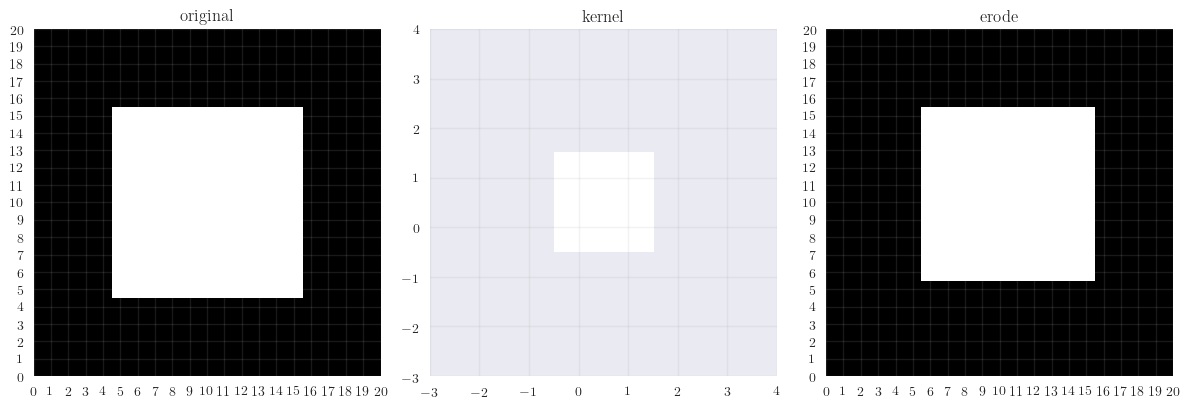

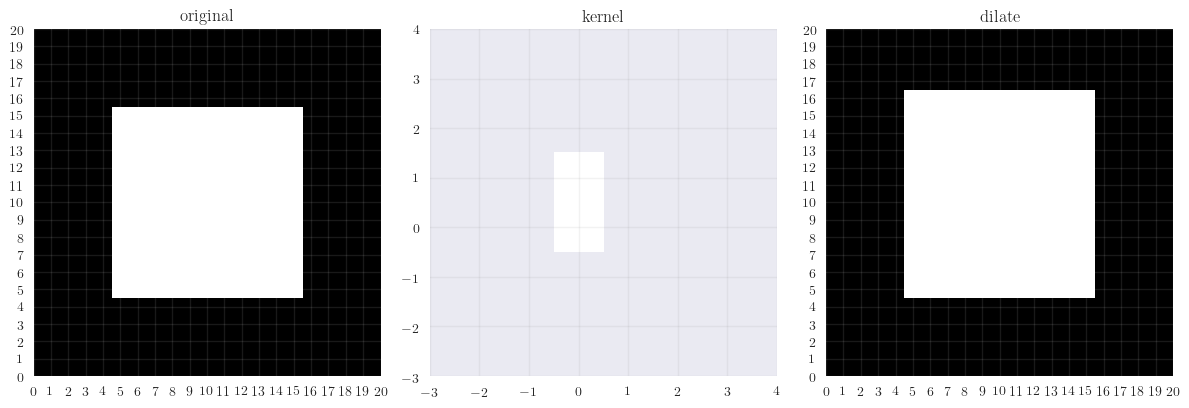

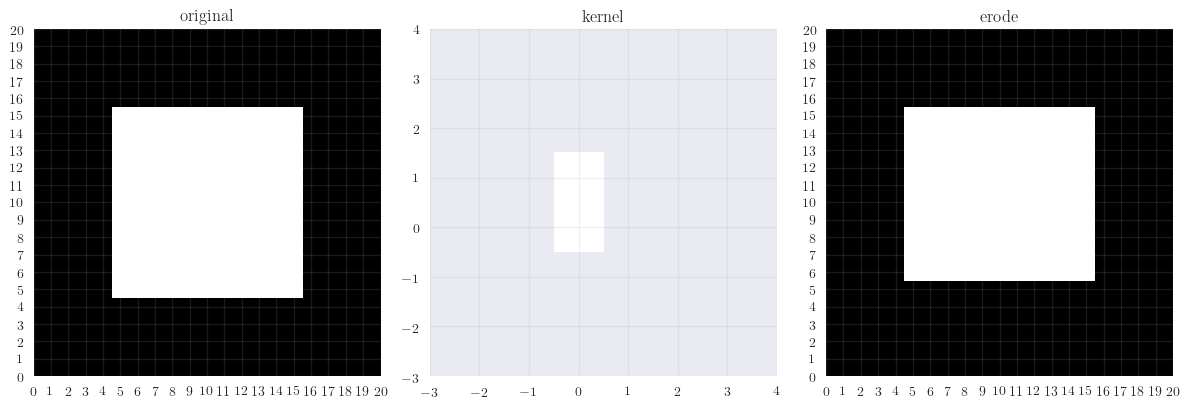

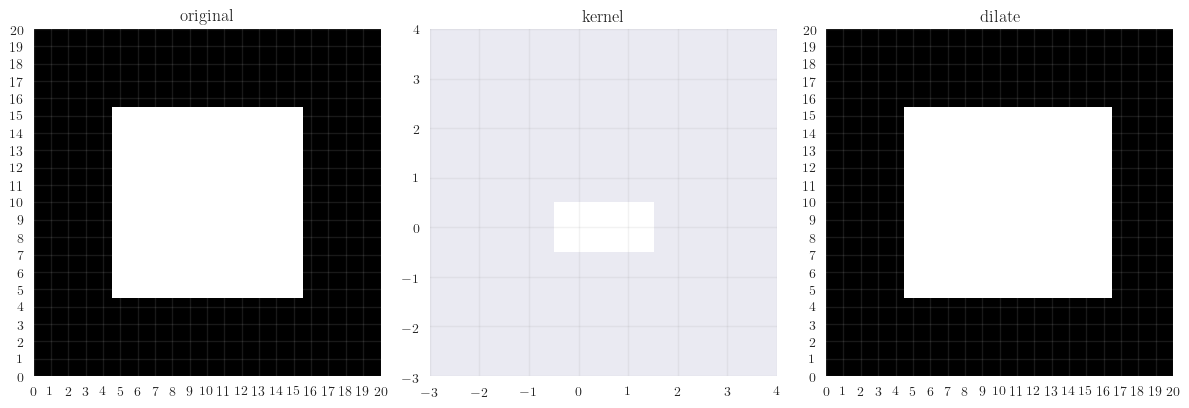

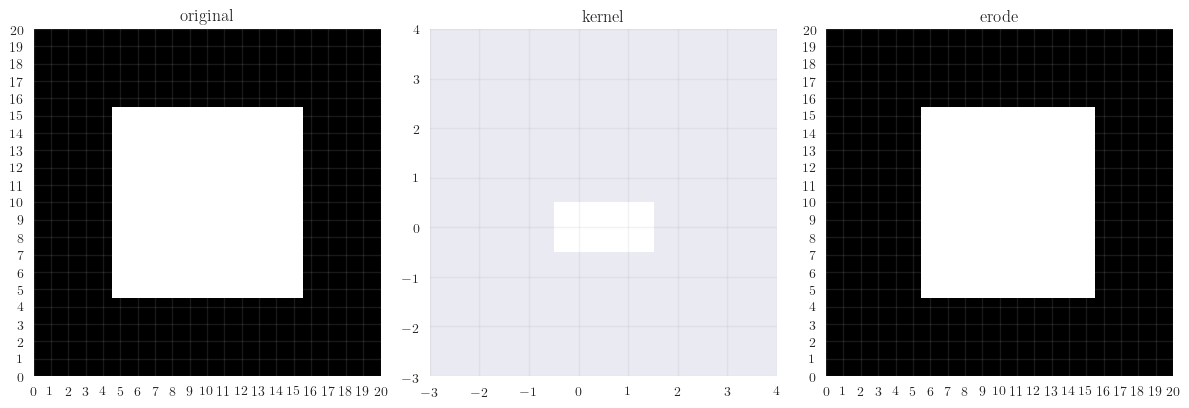

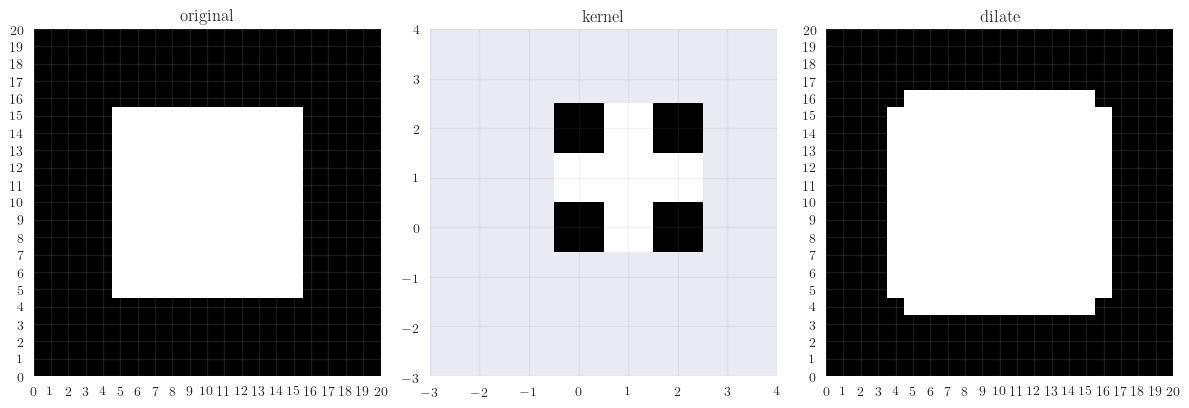

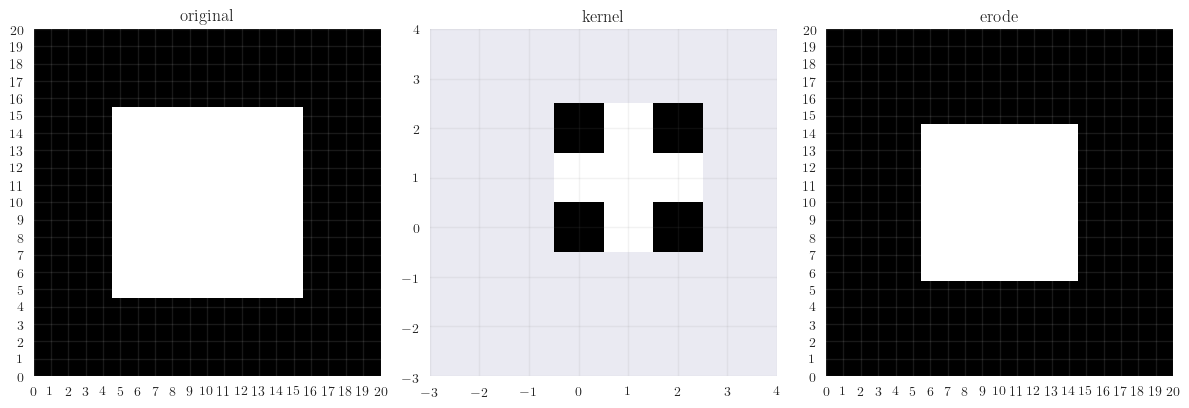

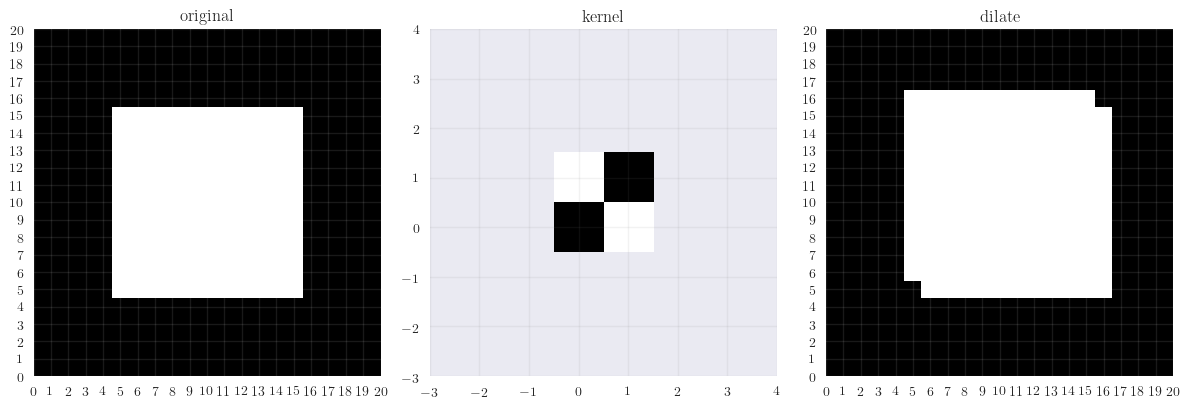

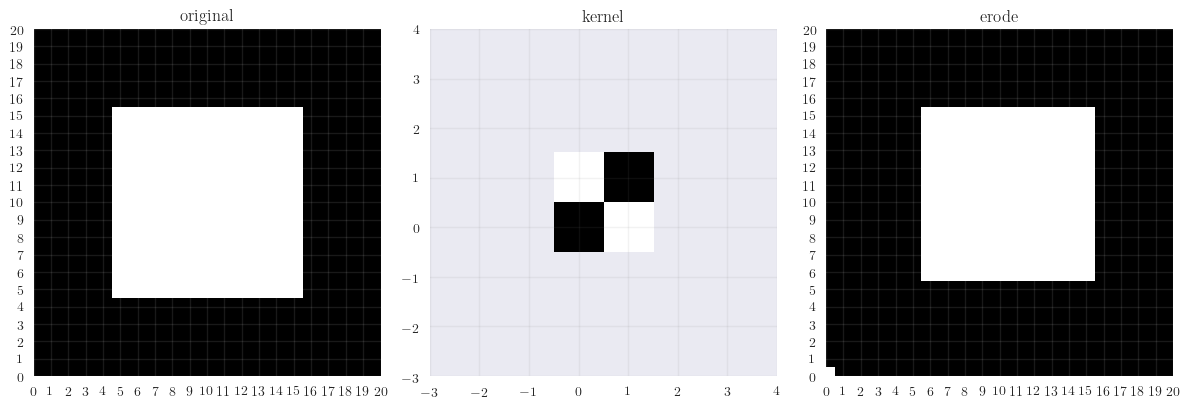

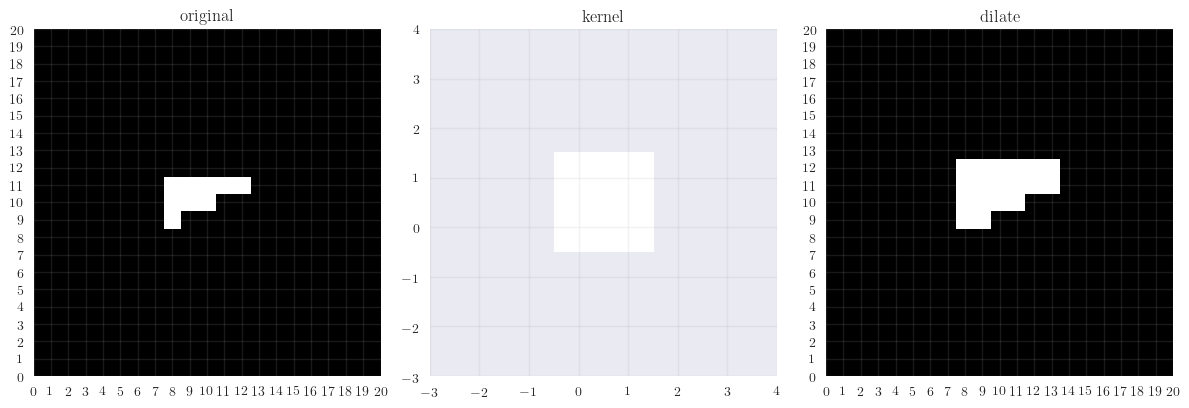

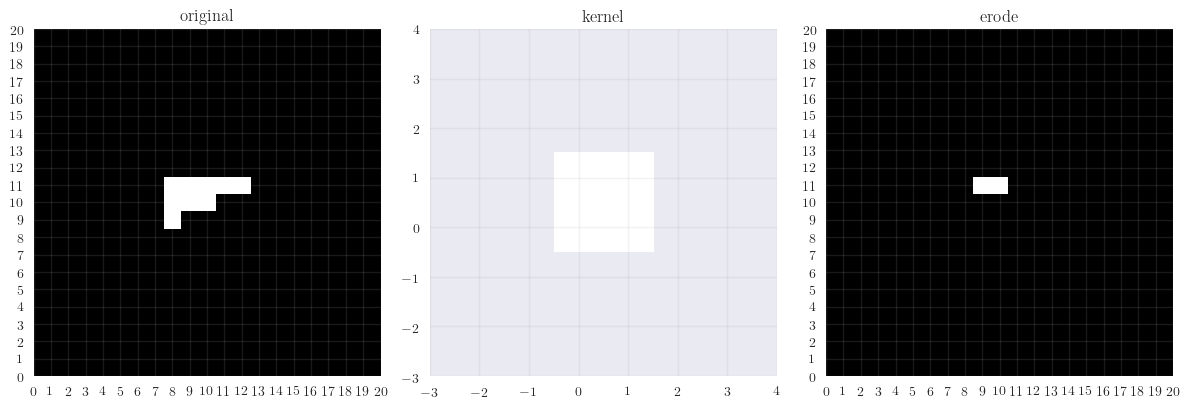

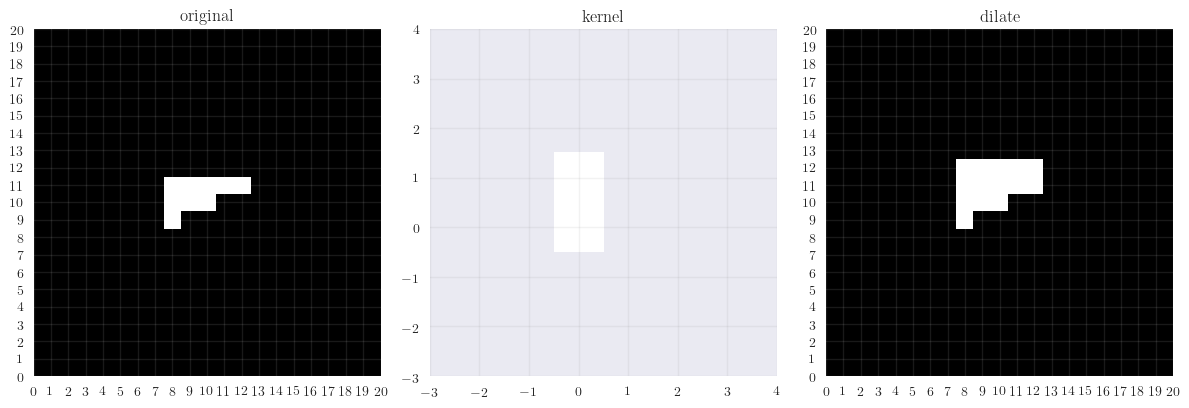

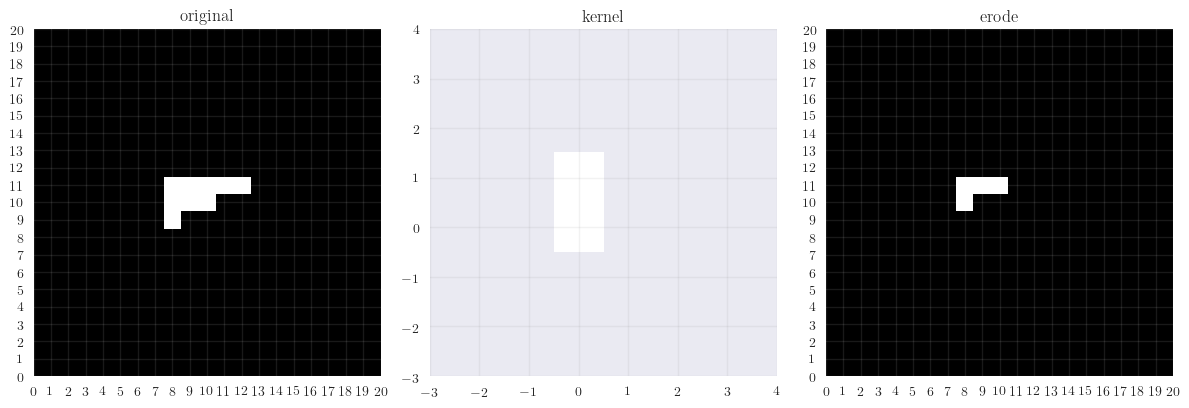

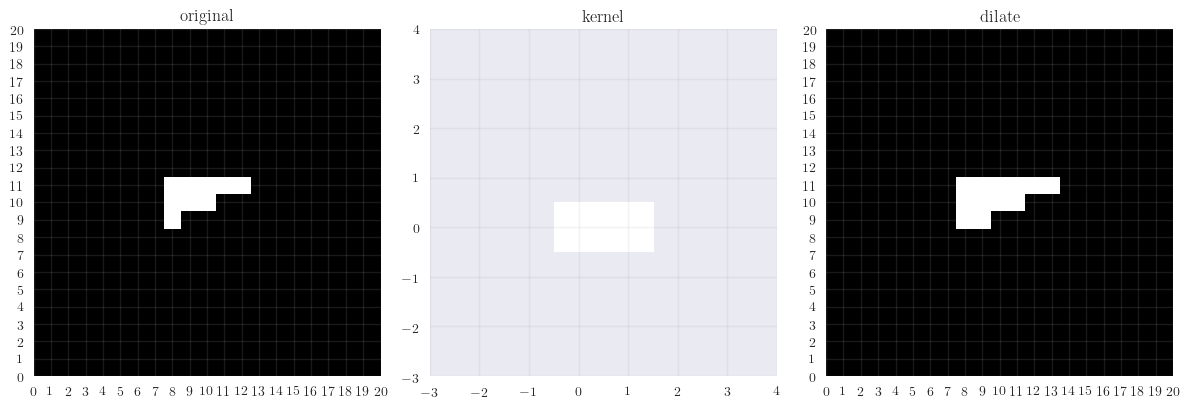

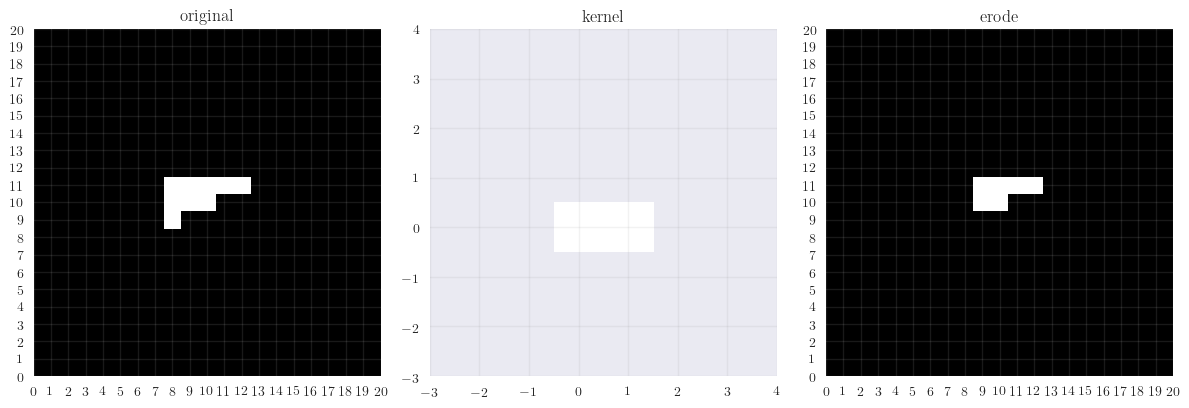

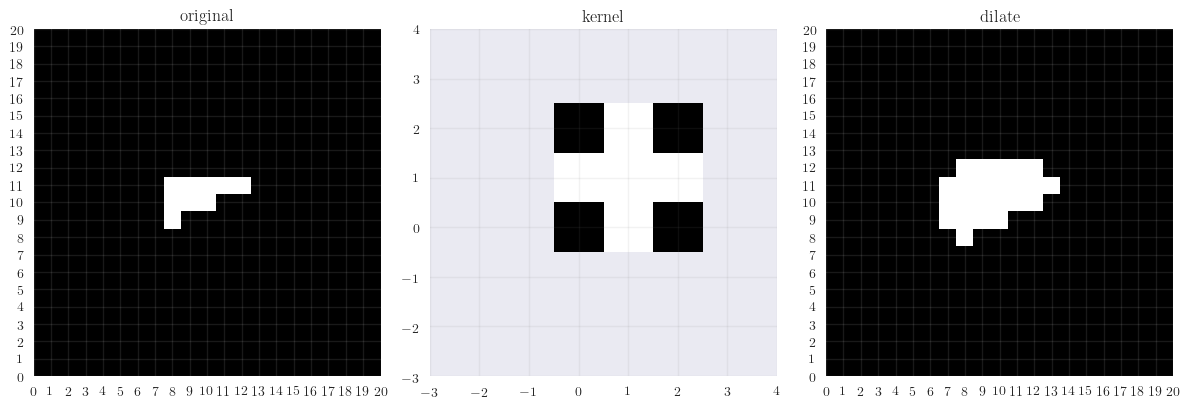

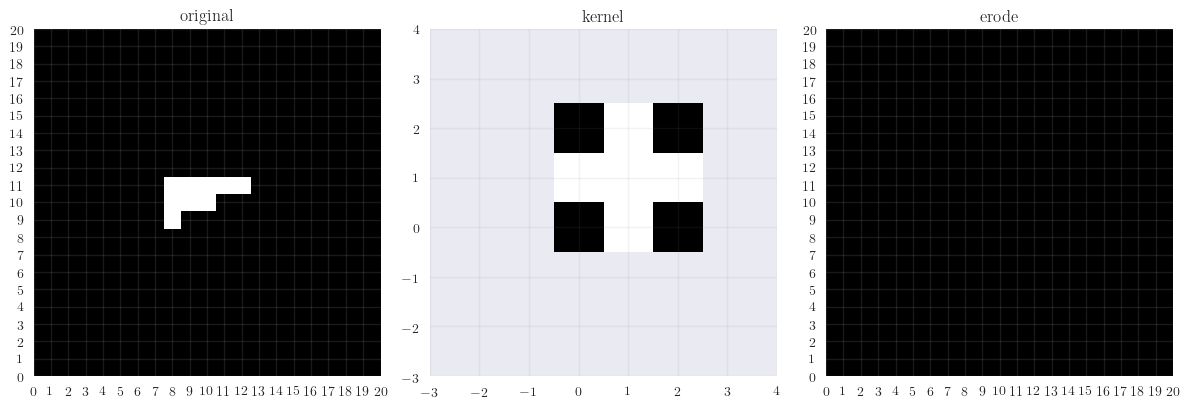

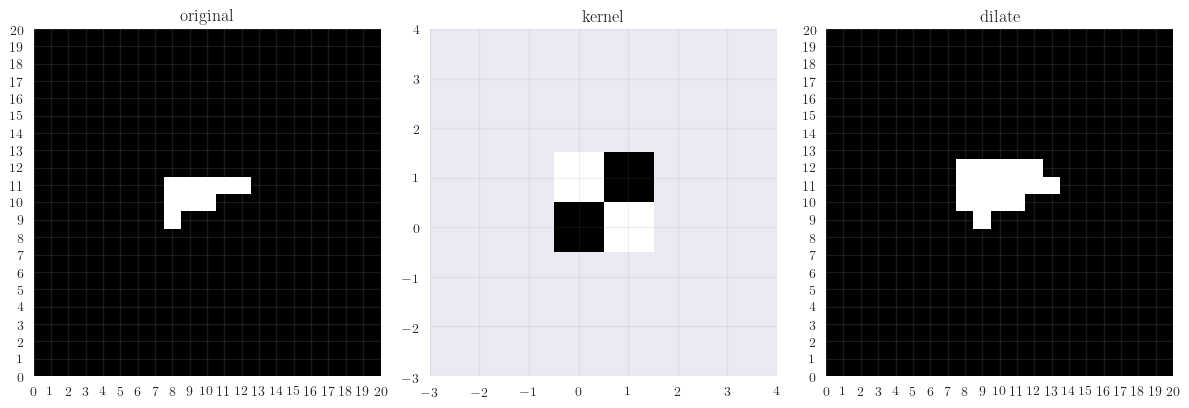

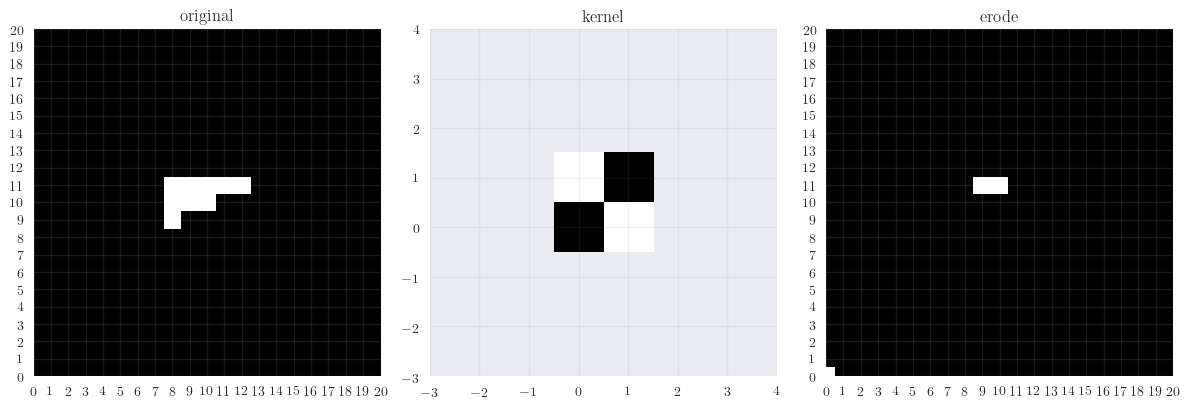

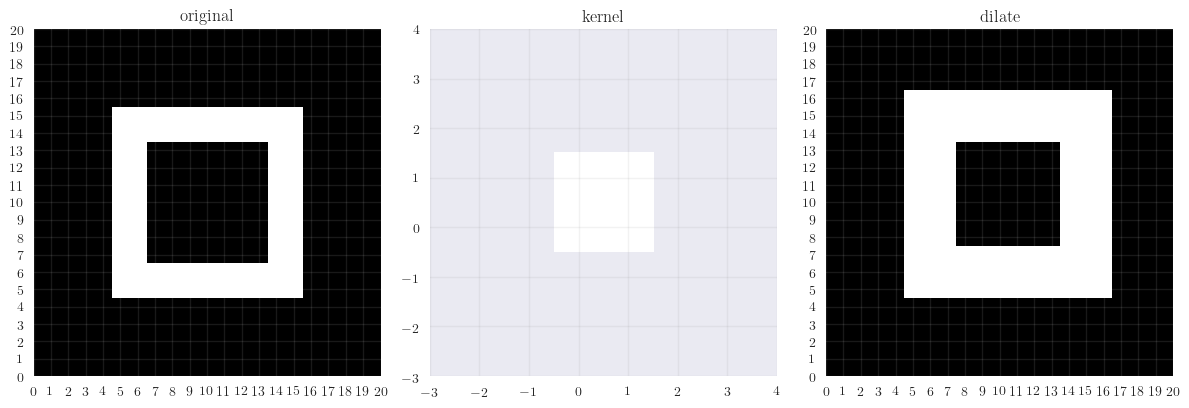

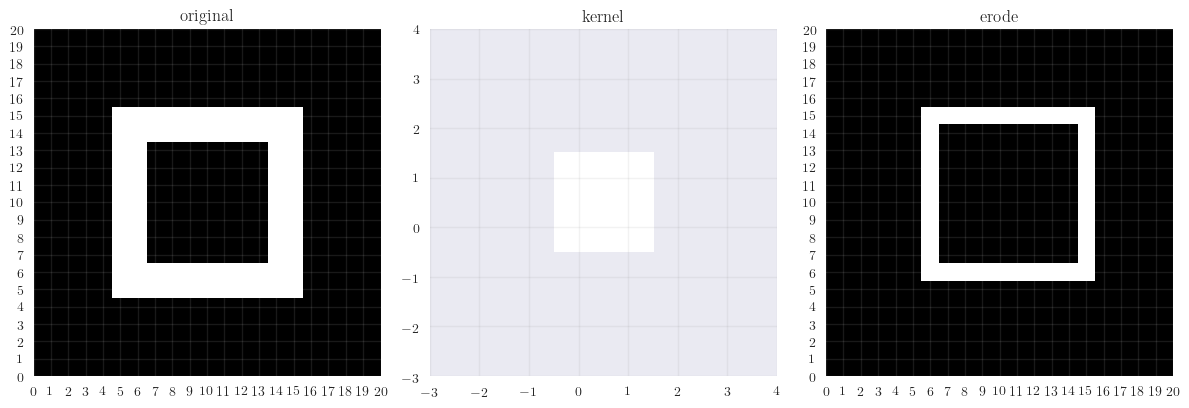

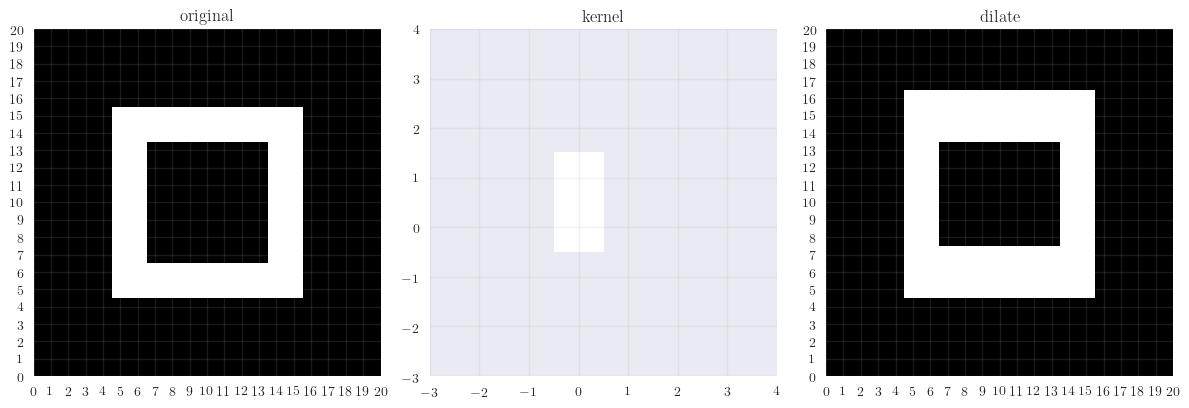

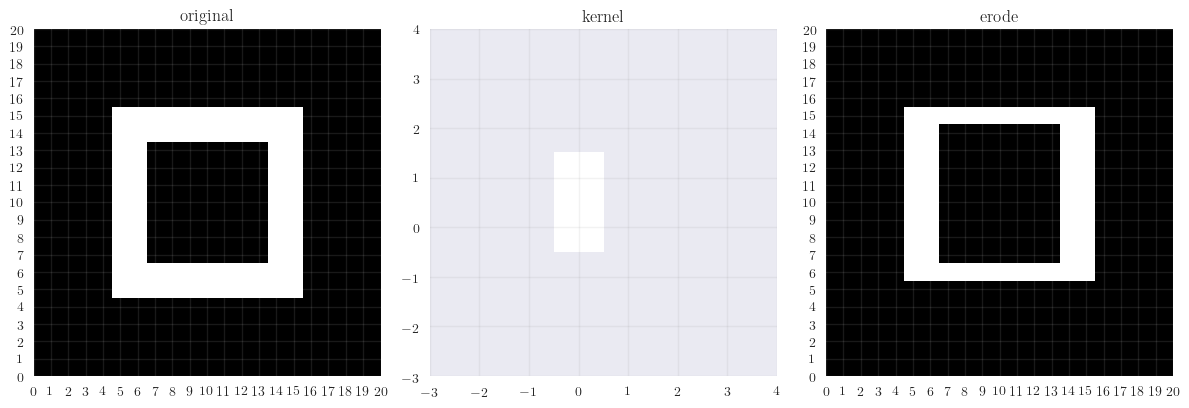

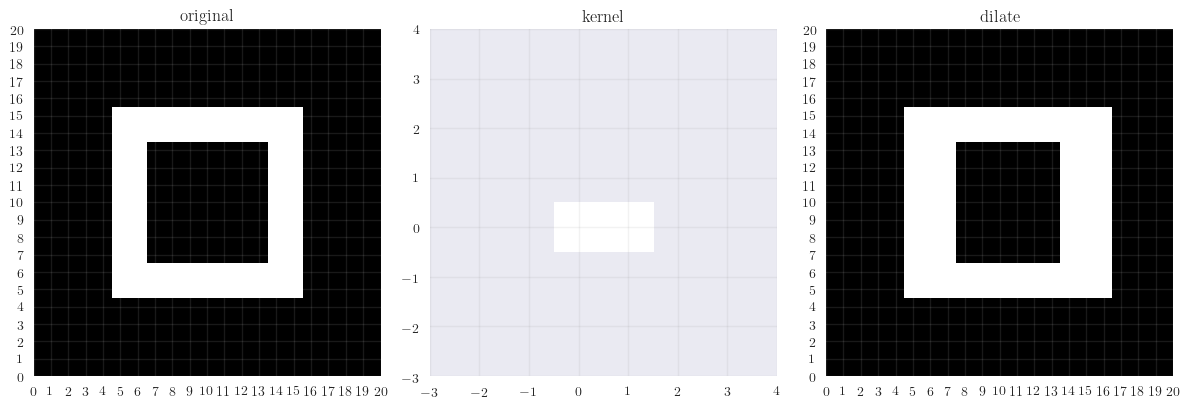

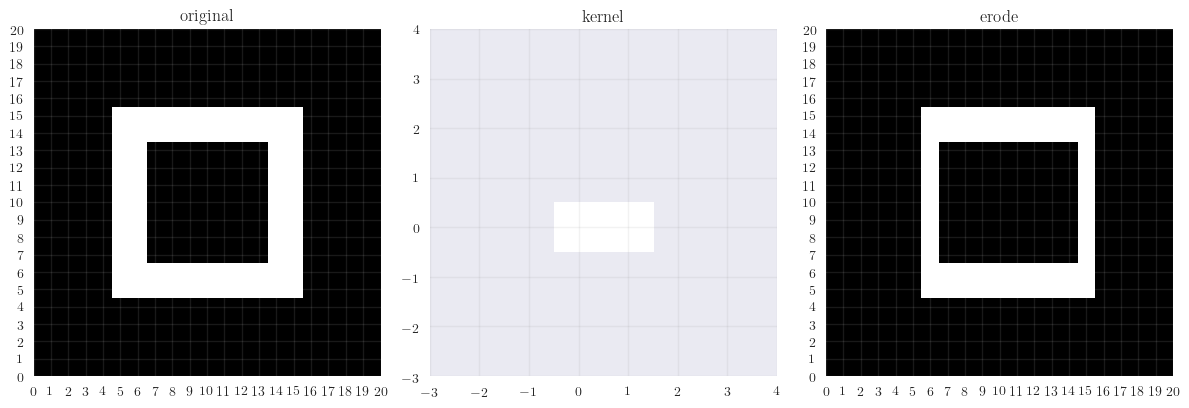

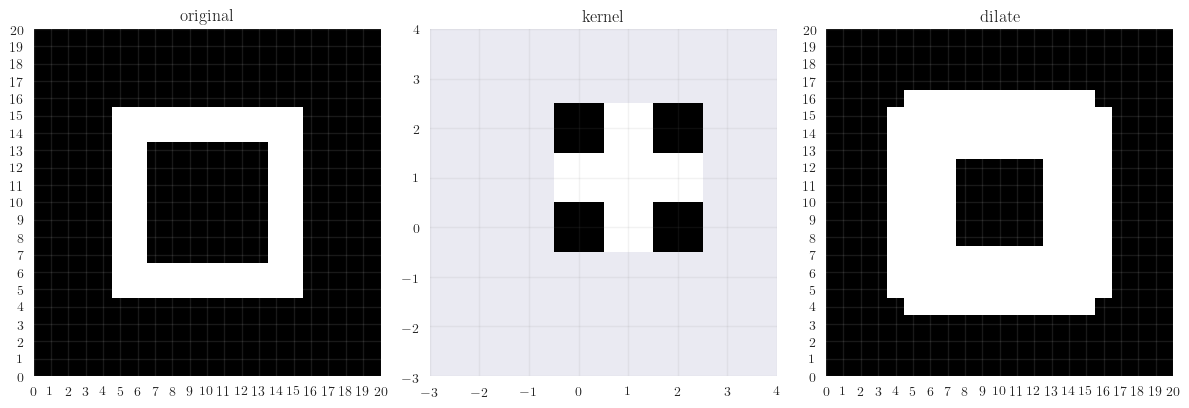

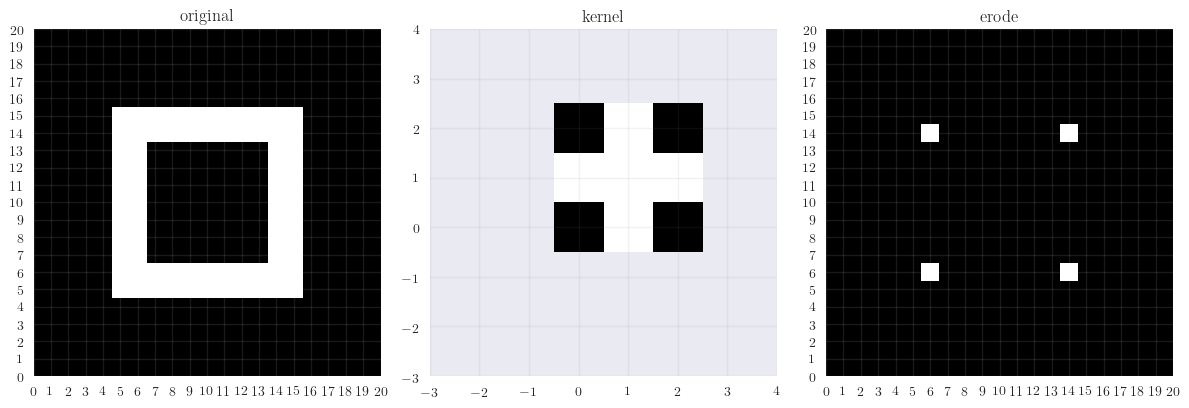

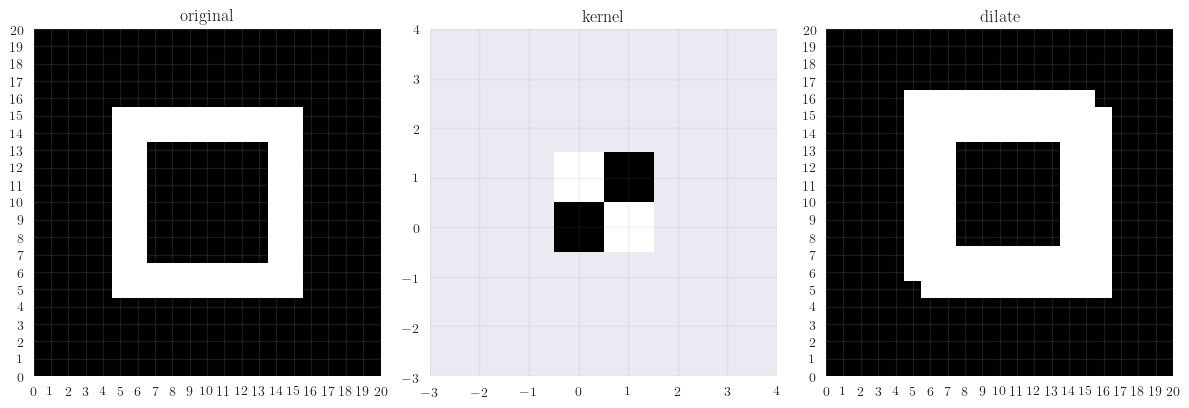

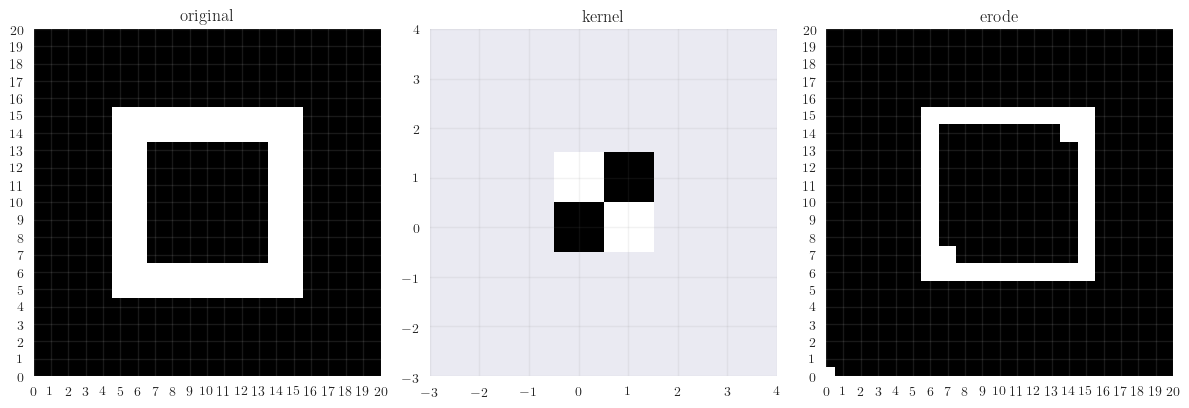

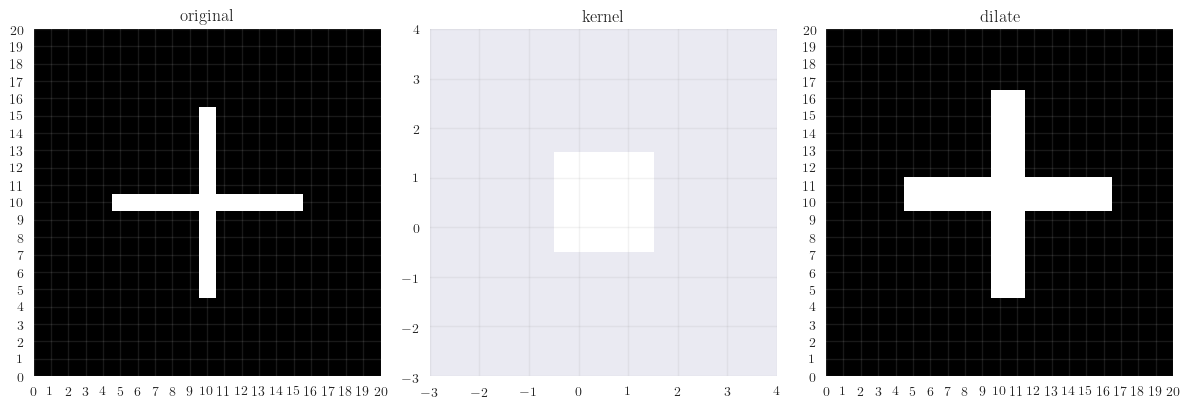

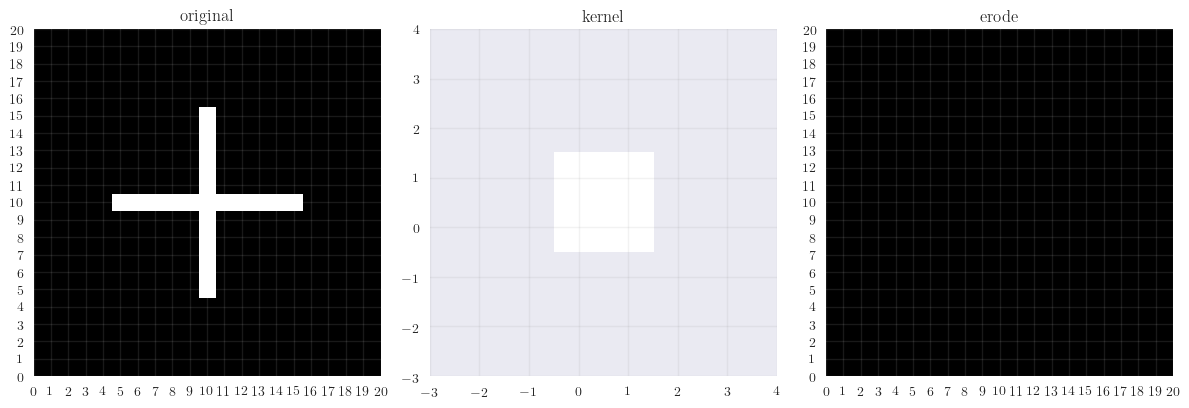

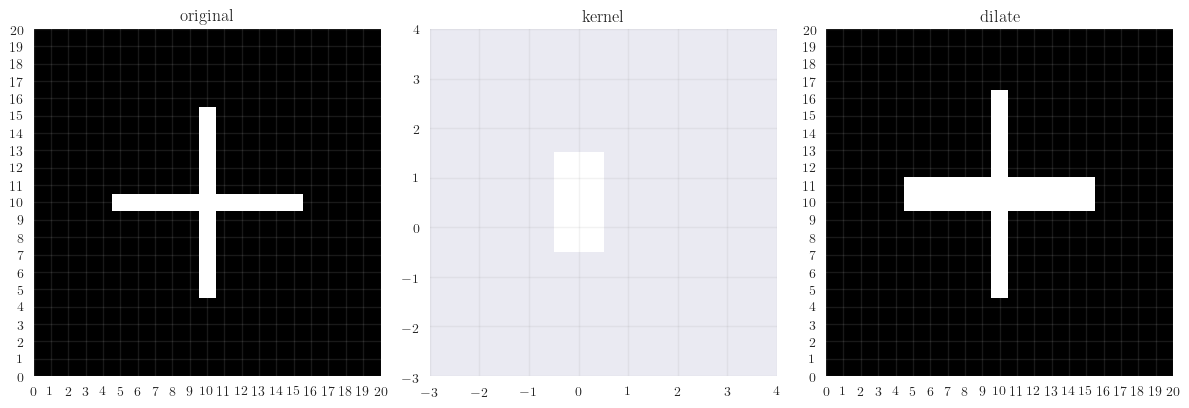

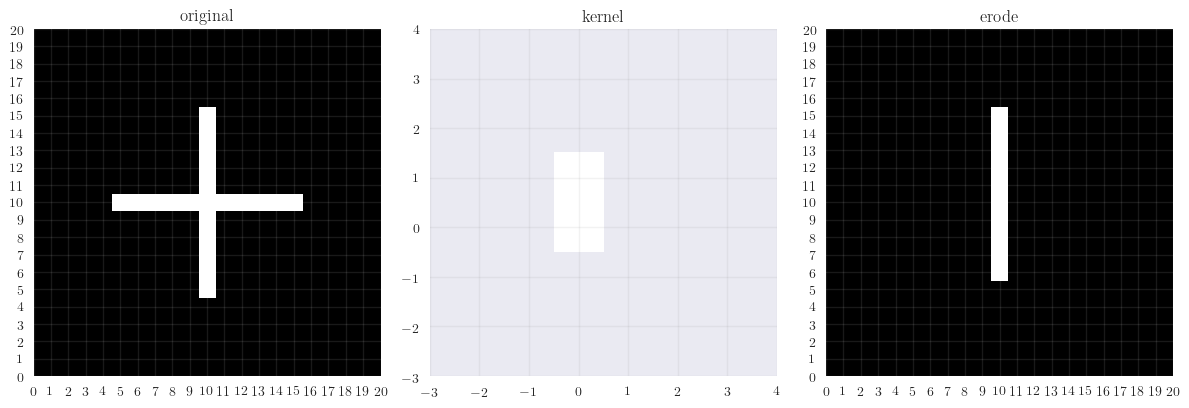

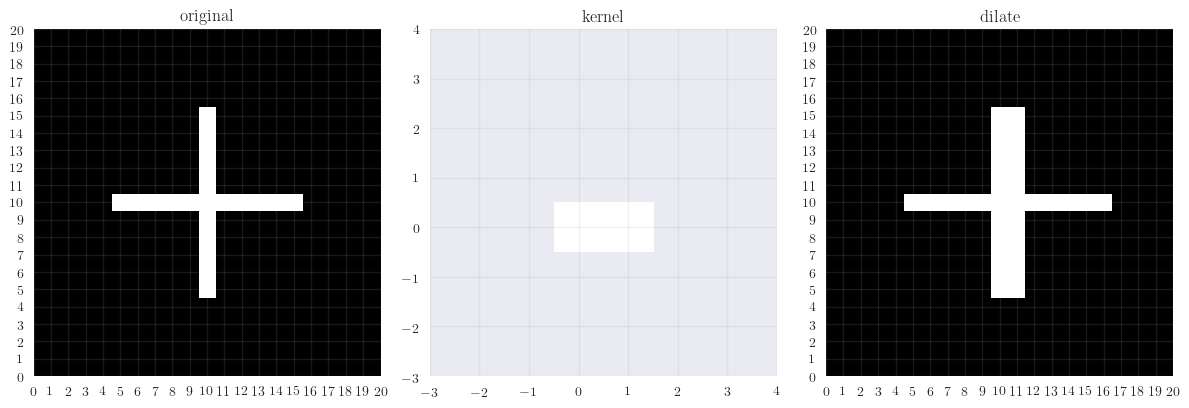

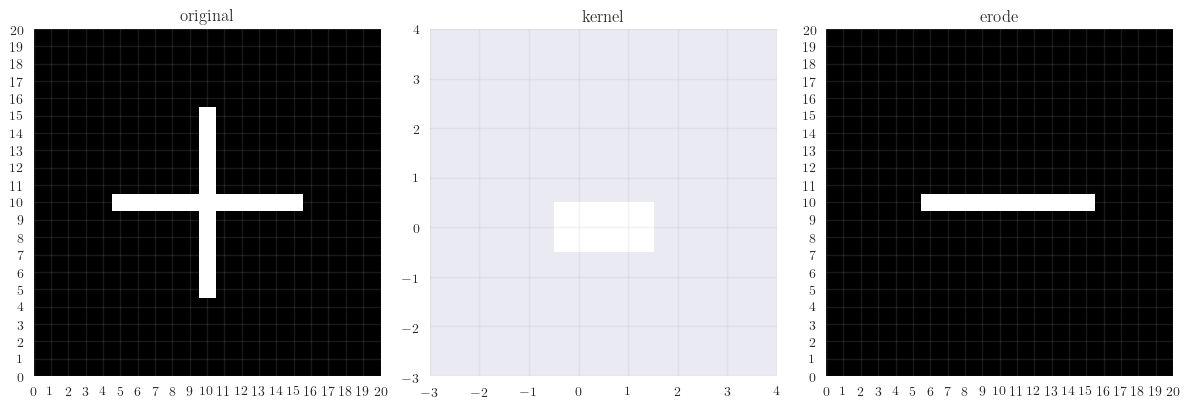

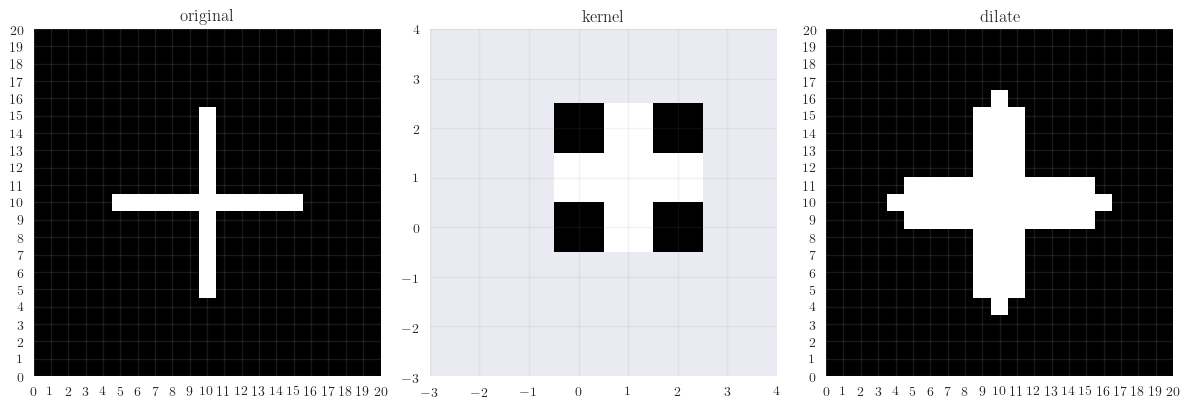

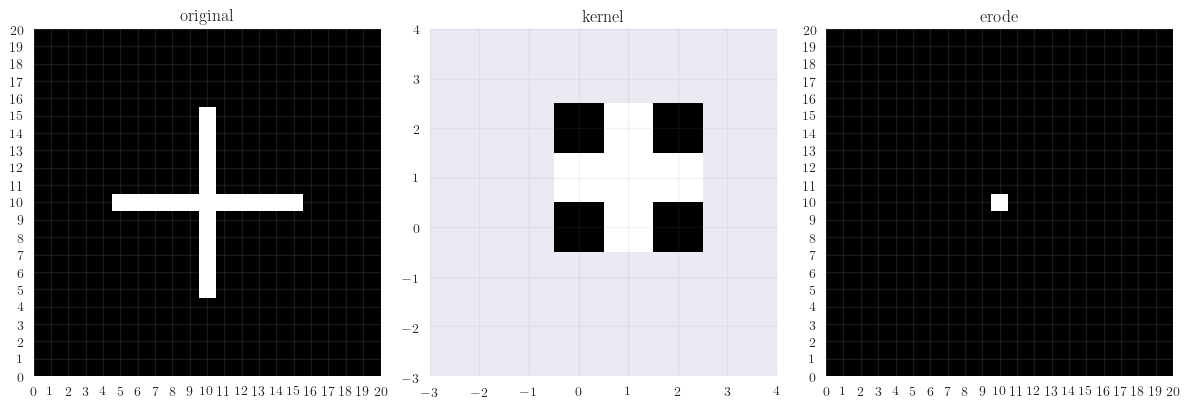

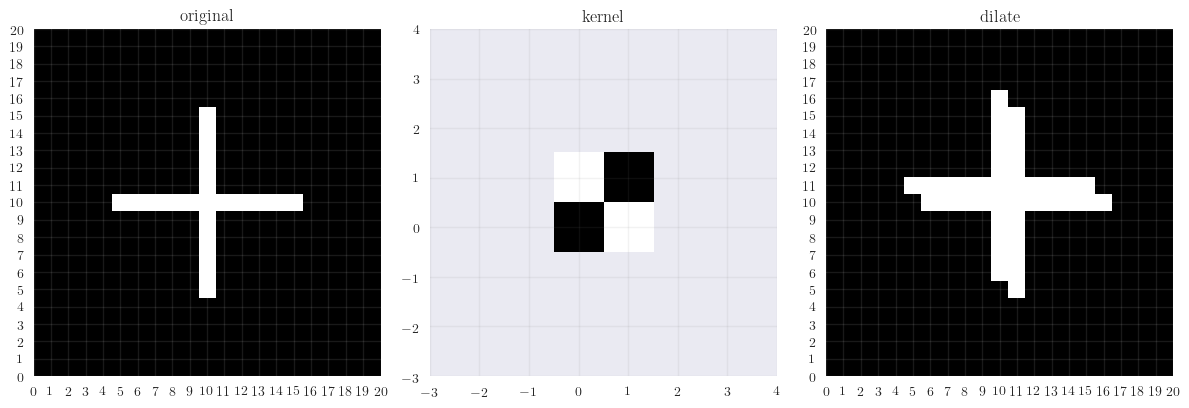

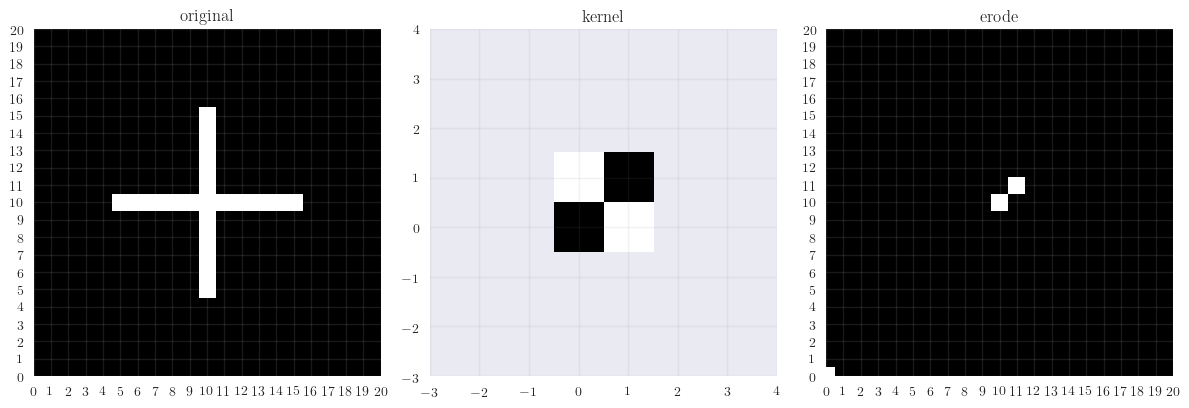

In [7]:
for s in shapes:
    for k in kernels:
        for i, op in enumerate(operations):
            morp.plot_op(s, k, op(s, k), opnames[i])

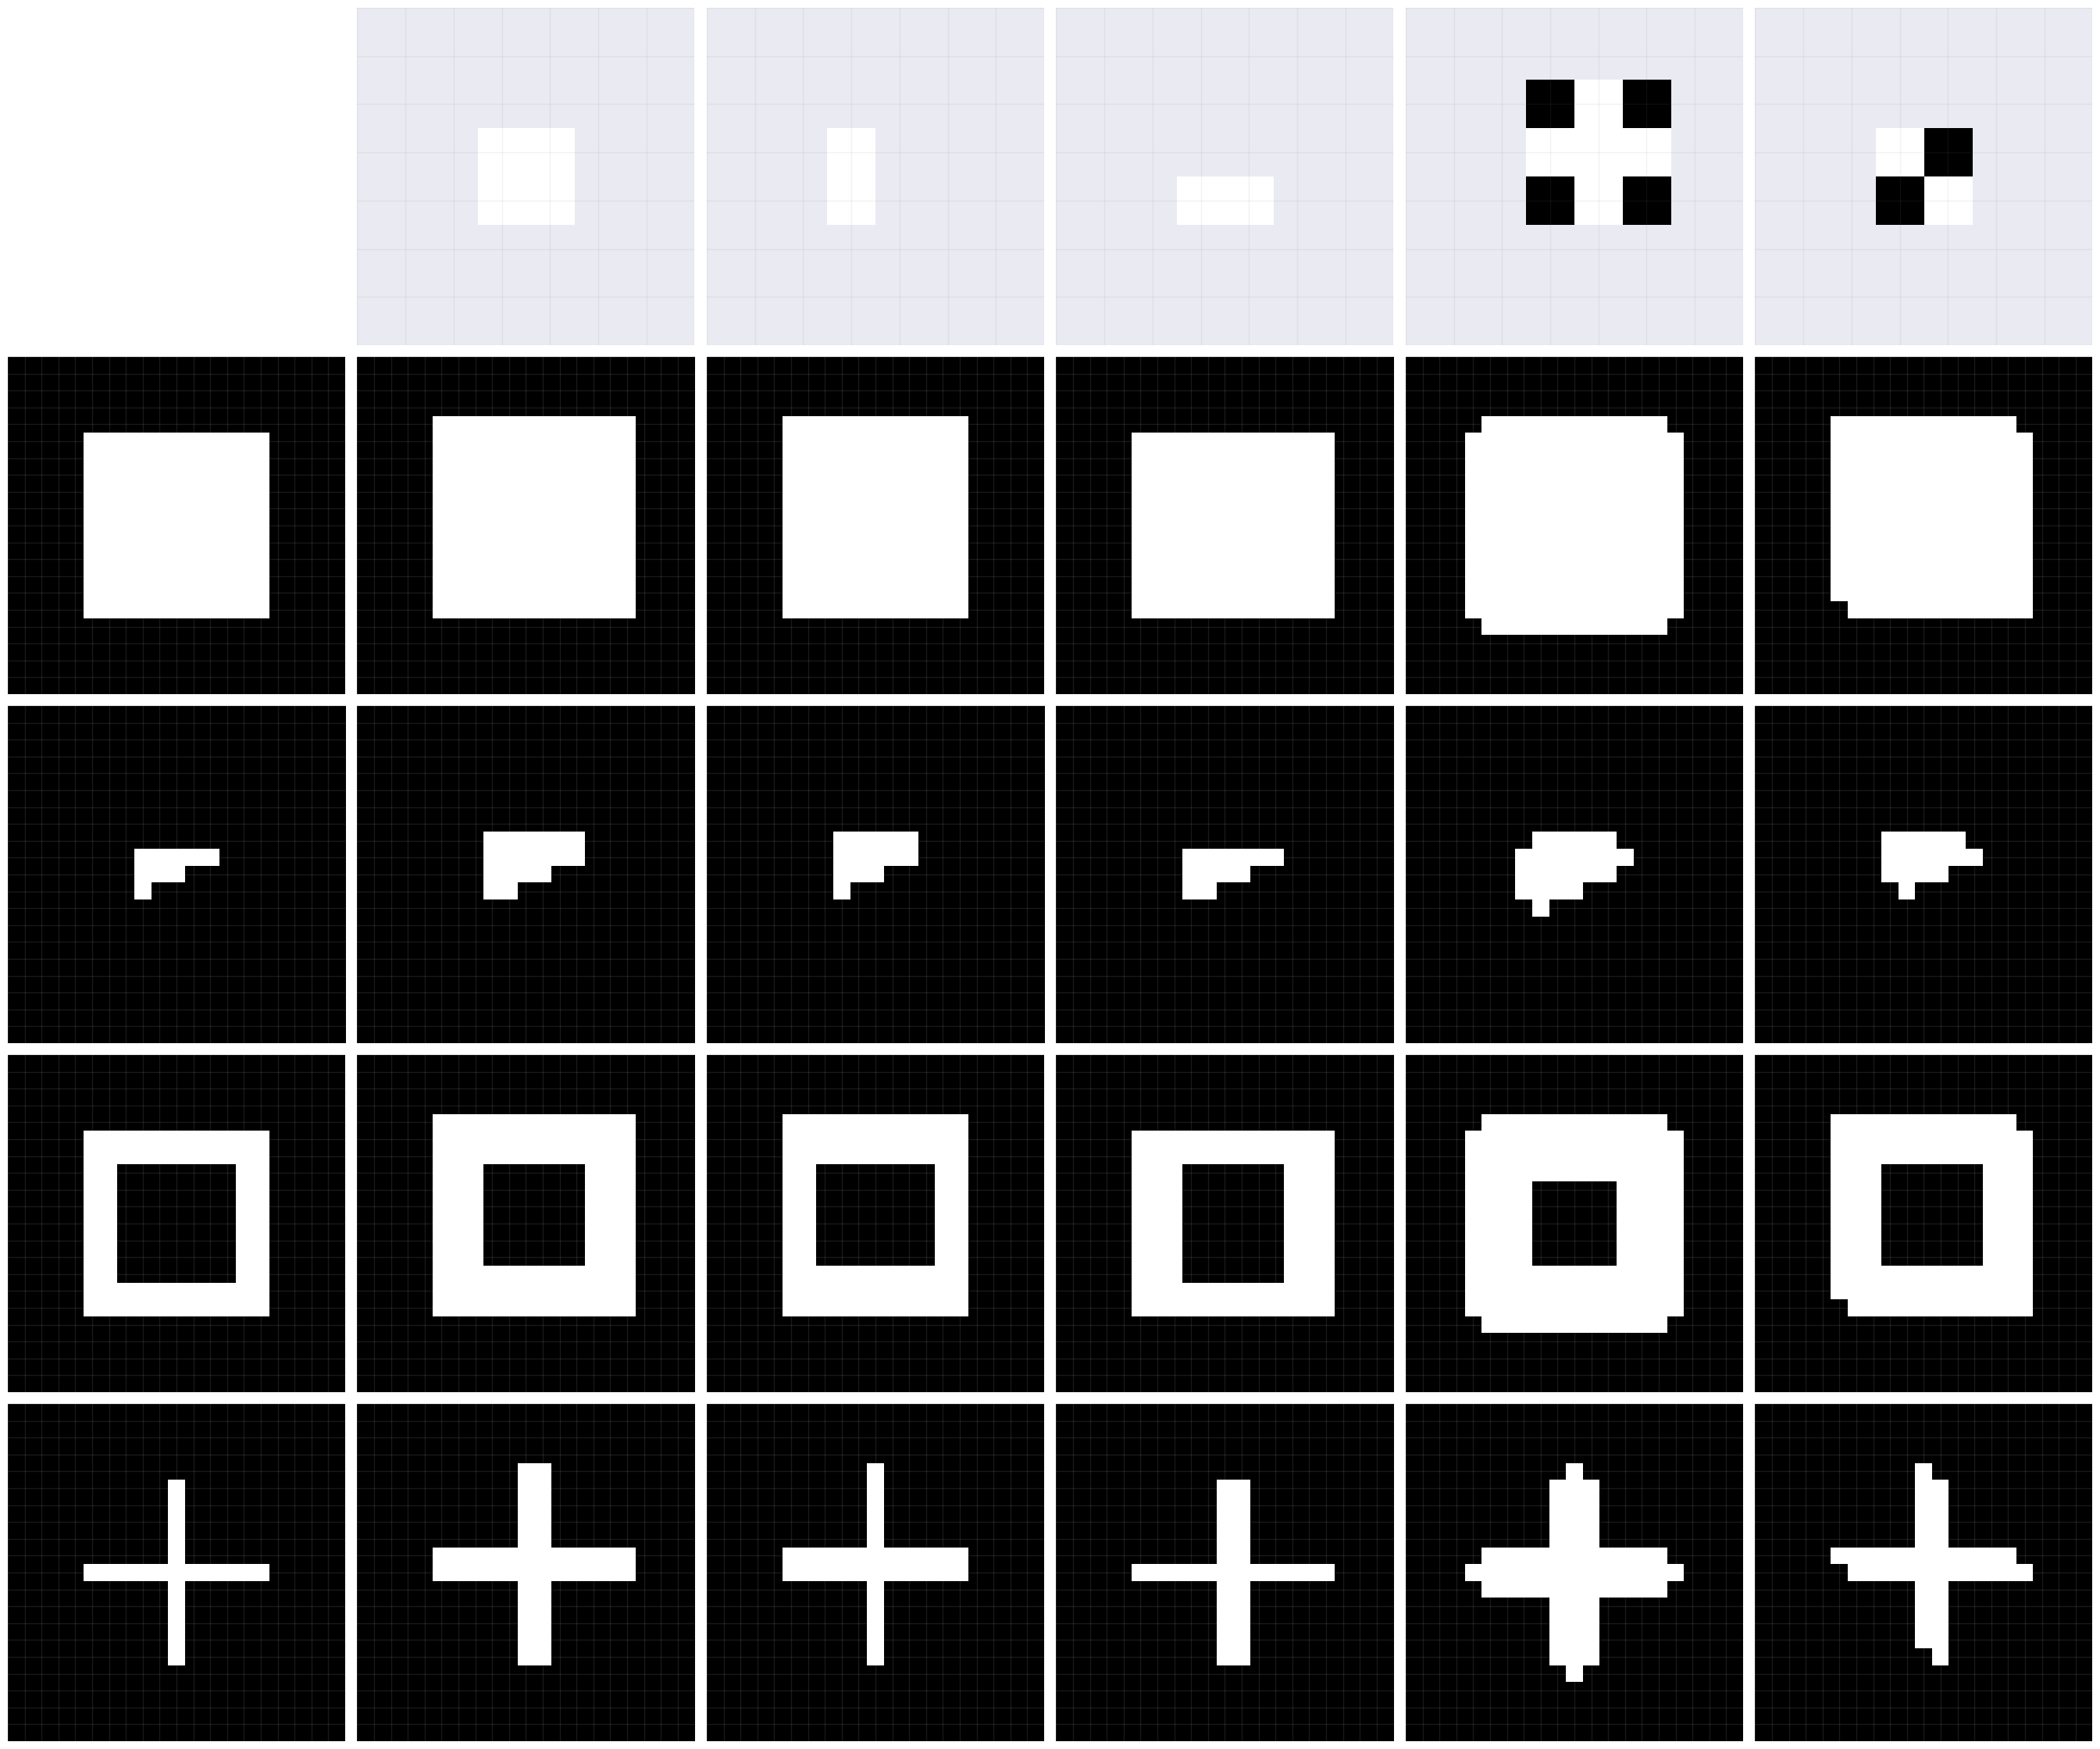

In [26]:
fig = mp.figure(figsize=(9/2*6, 9/2*5))
for i, k in enumerate(kernels):
    ax = fig.add_subplot(5, 6, i+2)
    ax.imshow(k, 'gray', vmin=0, vmax=1)
    ax.xaxis.set_major_locator(mp.MultipleLocator(1))
    ax.yaxis.set_major_locator(mp.MultipleLocator(1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(True, color='gray', alpha=0.1)
    ax.set_xlim(-3, 4)
    ax.set_ylim(-3, 4)
for i, s in enumerate(shapes):
    ax = fig.add_subplot(5, 6, ((i+1)*6)+1)
    ax.imshow(s, 'gray', vmin=0, vmax=255)
    ax.xaxis.set_major_locator(mp.MultipleLocator(1))
    ax.yaxis.set_major_locator(mp.MultipleLocator(1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(True, alpha=0.1)
    ax.set_xlim(0, 20)
    ax.set_ylim(0, 20)
counter = 8
for i, s in enumerate(shapes):
    for j, k in enumerate(kernels):
        ax = fig.add_subplot(5, 6, counter)
        ax.imshow(cv.dilate(s, k), 'gray')
        ax.xaxis.set_major_locator(mp.MultipleLocator(1))
        ax.yaxis.set_major_locator(mp.MultipleLocator(1))
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.grid(True, alpha=0.1)
        ax.set_xlim(0, 20)
        ax.set_ylim(0, 20)
        counter += 1
    counter += 1
mp.tight_layout()
mp.savefig('dilate.png', dpi=300, bbox_inches='tight')
mp.show()

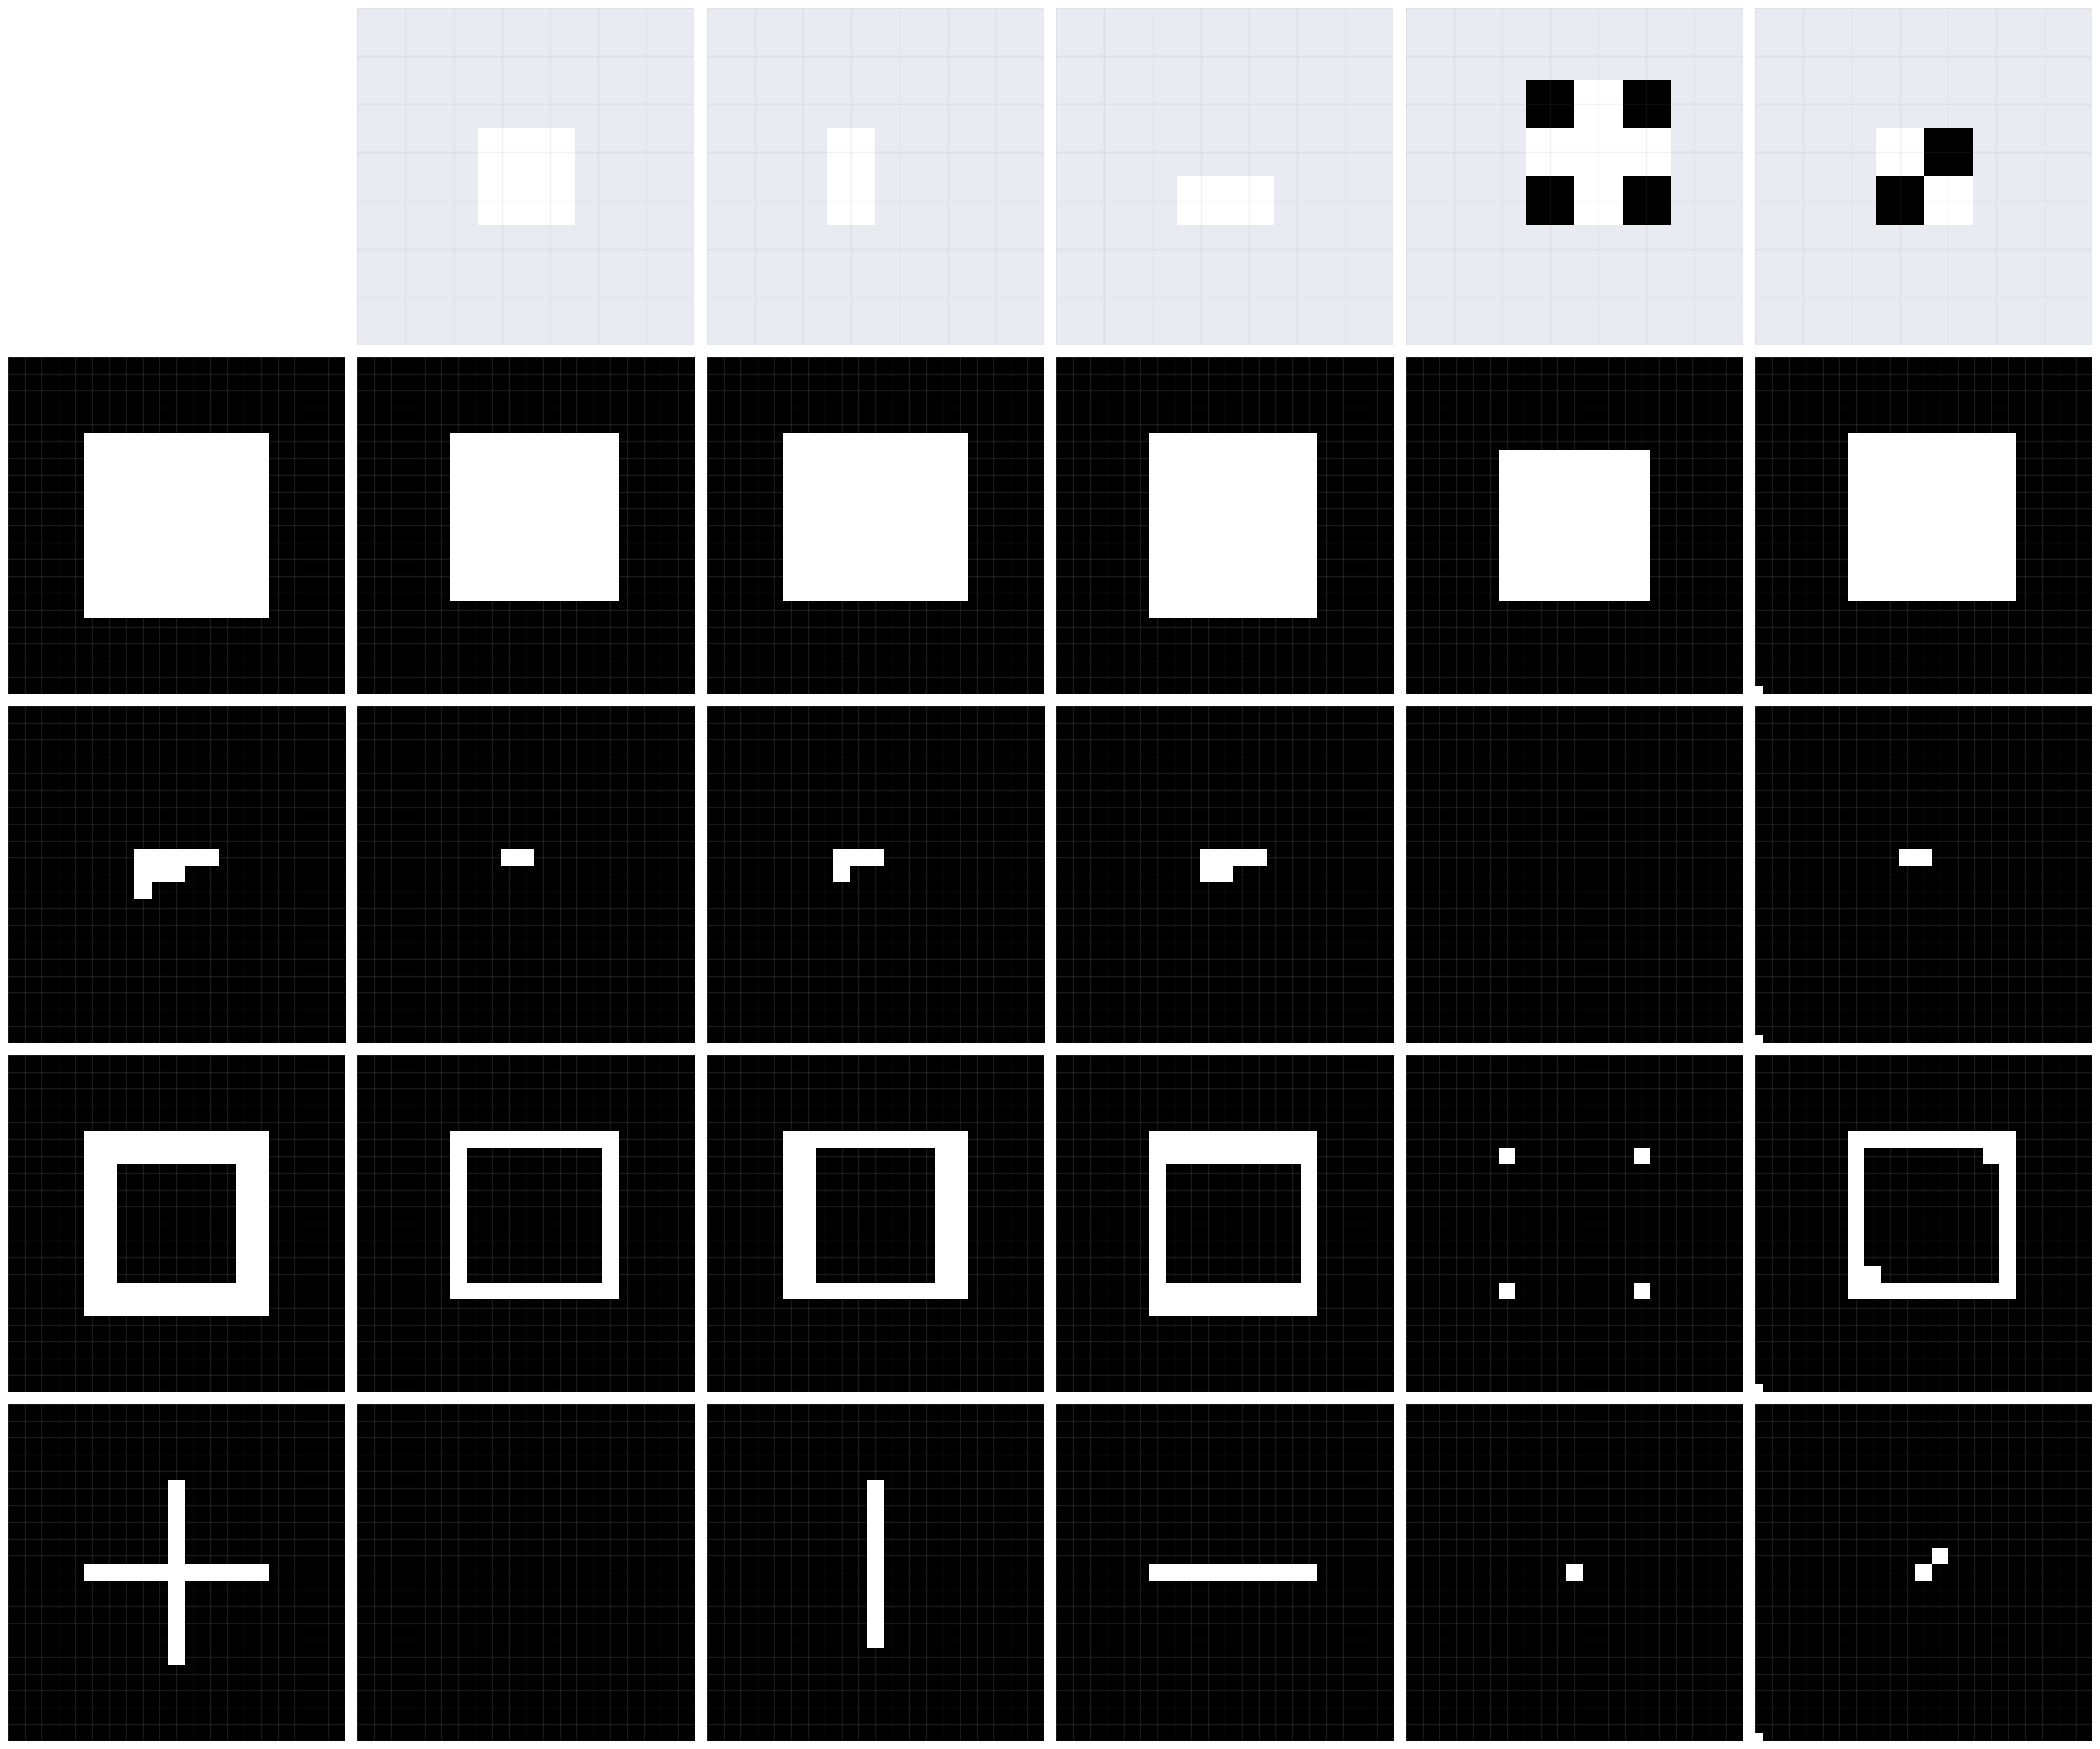

In [27]:
fig = mp.figure(figsize=(9/2*6, 9/2*5))
for i, k in enumerate(kernels):
    ax = fig.add_subplot(5, 6, i+2)
    ax.imshow(k, 'gray', vmin=0, vmax=1)
    ax.xaxis.set_major_locator(mp.MultipleLocator(1))
    ax.yaxis.set_major_locator(mp.MultipleLocator(1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(True, color='gray', alpha=0.1)
    ax.set_xlim(-3, 4)
    ax.set_ylim(-3, 4)
for i, s in enumerate(shapes):
    ax = fig.add_subplot(5, 6, ((i+1)*6)+1)
    ax.imshow(s, 'gray', vmin=0, vmax=255)
    ax.xaxis.set_major_locator(mp.MultipleLocator(1))
    ax.yaxis.set_major_locator(mp.MultipleLocator(1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(True, alpha=0.1)
    ax.set_xlim(0, 20)
    ax.set_ylim(0, 20)
counter = 8
for i, s in enumerate(shapes):
    for j, k in enumerate(kernels):
        ax = fig.add_subplot(5, 6, counter)
        ax.imshow(cv.erode(s, k), 'gray')
        ax.xaxis.set_major_locator(mp.MultipleLocator(1))
        ax.yaxis.set_major_locator(mp.MultipleLocator(1))
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.grid(True, alpha=0.1)
        ax.set_xlim(0, 20)
        ax.set_ylim(0, 20)
        counter += 1
    counter += 1
mp.tight_layout()
mp.savefig('erode.png', dpi=300, bbox_inches='tight')
mp.show()